# Data Preprocessing

## Removing unopenable files

In [8]:
import os
import cv2

In [54]:
for folder in os.listdir("unprocessed data"):
    for file in os.listdir(os.path.join("unprocessed data", folder)):
        try:
            cv2.imread(os.path.join('unprocessed data', folder, file))
        except Exception as e:
            os.remove(os.path.join("unprocessed data", folder, file))
            print(f"Removed {file} [{e}]")

It seems like there are no corrupt or unopenable files

## Data Augmentation

### Importing Modules

In [1]:
import albumentations as A

c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import matplotlib.pyplot as plt

In [3]:
import uuid

In [4]:
from PIL import Image

In [5]:
import numpy as np

### Transformations

In [6]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.RandomRotate90(),
    A.Flip(),
    A.RGBShift(),
    A.HueSaturationValue(),
    A.CLAHE(),
    A.RandomGamma(),
    A.Blur(),
    A.ToGray(),
    A.ImageCompression(),
])
# listing transformations 

In [9]:
testImage = cv2.cvtColor(cv2.imread('unprocessed data/supercars/48832.jpg'), cv2.COLOR_BGR2RGB)

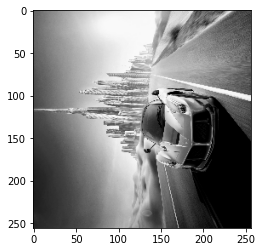

In [10]:
plt.imshow(cv2.resize(transform(image=testImage)['image'], (256, 256)))

In [12]:
# for folder in os.listdir("unprocessed data"):
#     folderContents = os.listdir(os.path.join("unprocessed data", folder))
#     for i, file in enumerate(folderContents):
#         filePath = os.path.join("unprocessed data", folder, file)
#         image = Image.open(filePath)
#         image = np.array(image)
#         for _ in range(50):
#             augmentedImg = transform(image=image)['image']
#             augmentedImg = cv2.resize(augmentedImg, (256, 256))
#             cv2.imwrite(os.path.join('augmented data', folder, str(uuid.uuid1()) + '.jpg'), augmentedImg)
#         print(f'[{folder}] {round((i/len(folderContents)) * 100, 2)}% complete')

[supercars] 0.0% complete
[supercars] 0.27% complete
[supercars] 0.55% complete
[supercars] 0.82% complete
[supercars] 1.09% complete
[supercars] 1.37% complete
[supercars] 1.64% complete
[supercars] 1.91% complete
[supercars] 2.19% complete
[supercars] 2.46% complete
[supercars] 2.73% complete
[supercars] 3.01% complete
[supercars] 3.28% complete
[supercars] 3.55% complete
[supercars] 3.83% complete
[supercars] 4.1% complete
[supercars] 4.37% complete
[supercars] 4.64% complete
[supercars] 4.92% complete
[supercars] 5.19% complete
[supercars] 5.46% complete
[supercars] 5.74% complete
[supercars] 6.01% complete
[supercars] 6.28% complete
[supercars] 6.56% complete
[supercars] 6.83% complete
[supercars] 7.1% complete
[supercars] 7.38% complete
[supercars] 7.65% complete


TypeError: RGBShift transformation expects 3-channel images.

This method is discarded due to being slow, will be using threads to fasten up the process

In [35]:
def augment(imageList:list[str], className:str, threadID:int):
    """
    Generates augmentations of images
    """
    imageList = list( map( lambda x: os.path.join("unprocessed data", className, x), imageList ))
    # getting the path 
    for i, filePath in enumerate(imageList):
        image = Image.open(filePath)
        image = np.array(image)
        # loading image 

        for _ in range(15):
            try:
                augmentedImg = transform(image=image)['image']
                augmentedImg = cv2.resize(augmentedImg, (256, 256))
                cv2.imwrite(os.path.join('augmented data', className, str(uuid.uuid1()) + '.jpg'), augmentedImg) 
                # augmenting the image 
            except Exception as e:
                print(f'[ERROR] {e}')
        cv2.imwrite(os.path.join('augmented data', className, str(uuid.uuid1()) + '.jpg'), cv2.resize(image, (256, 256)))

        print(f'[THREAD {threadID}] [CLASS {className}] {round((i/len(imageList)) * 100, 2)}% complete')
        


In [24]:
def split(a, n):
    """
    splits a list into n parts
    """
    k, m = divmod(len(a), n)
    return list(a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))


In [38]:
superCarsTargets = split(os.listdir(os.path.join('unprocessed data', 'supercars')), 22)
SUVTargets = split(os.listdir(os.path.join('unprocessed data', 'suv')), 20)

In [41]:
len(superCarsTargets), len(SUVTargets)

(22, 20)

In [42]:
import threading

In [43]:
threads = []

for i, superCarsTargetSet in enumerate(superCarsTargets):
    threads.append(threading.Thread(target=augment, args=(superCarsTargetSet, 'supercars', i)))

In [ ]:
# for thread in threads:
#     thread.start()
# commented out to avoid accidently running again 

Exception in thread Thread-6 (augment):
Traceback (most recent call last):
  File "c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\threading.py", line 952, in run
    if self._target is not None:
AttributeError: 'Thread' object has no attribute '_target'. Did you mean: '_started'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\threading.py", line 957, in run
    del self._target, self._args, self._kwargs
AttributeError: _target
Exception in thread Thread-7 (augment):
Traceback (most recent call last):
  File "c:\Users\foxin\AppData\Local\Programs\Python\Python310\lib\threading.py", line 952, in run
    if self._target is not None:
AttributeError: 'Thread' object has no attribute '_target'. Did you mean: '_started'?

During han

[THREAD 5] [CLASS supercars] 0.0% complete
[THREAD 4] [CLASS supercars] 0.0% complete
[THREAD 6] [CLASS supercars] 0.0% complete
[THREAD 8] [CLASS supercars] 0.0% complete
[THREAD 5] [CLASS supercars] 5.88% complete
[THREAD 7] [CLASS supercars] 0.0% complete
[THREAD 6] [CLASS supercars] 5.88% complete
[THREAD 4] [CLASS supercars] 5.88% complete
[THREAD 9] [CLASS supercars] 0.0% complete
[THREAD 8] [CLASS supercars] 5.88% complete
[THREAD 10] [CLASS supercars] 0.0% complete
[THREAD 7] [CLASS supercars] 5.88% complete
[THREAD 12] [CLASS supercars] 0.0% complete
[THREAD 6] [CLASS supercars] 11.76% complete
[THREAD 11] [CLASS supercars] 0.0% complete
[THREAD 5] [CLASS supercars] 11.76% complete
[THREAD 9] [CLASS supercars] 5.88% complete
[THREAD 4] [CLASS supercars] 11.76% complete
[THREAD 4] [CLASS supercars] 17.65% complete
[THREAD 13] [CLASS supercars] 0.0% complete
[THREAD 7] [CLASS supercars] 11.76% complete
[THREAD 9] [CLASS supercars] 11.76% complete
[THREAD 11] [CLASS supercars] 5.

[THREAD 16] [CLASS supercars] 12.5% complete
[THREAD 10] [CLASS supercars] 23.53% complete
[THREAD 17] [CLASS supercars] 6.25% complete
[THREAD 6] [CLASS supercars] 29.41% complete
[THREAD 4] [CLASS supercars] 35.29% complete
[THREAD 15] [CLASS supercars] 12.5% complete
[THREAD 3] [CLASS supercars] 0.0% complete
[THREAD 9] [CLASS supercars] 29.41% complete
[THREAD 13] [CLASS supercars] 23.53% complete
[THREAD 18] [CLASS supercars] 6.25% complete
[THREAD 5] [CLASS supercars] 35.29% complete
[THREAD 11] [CLASS supercars] 23.53% complete[THREAD 14] [CLASS supercars] 12.5% complete

[THREAD 20] [CLASS supercars] 0.0% complete
[THREAD 6] [CLASS supercars] 35.29% complete
[THREAD 8] [CLASS supercars] 29.41% complete
[THREAD 19] [CLASS supercars] 6.25% complete
[THREAD 12] [CLASS supercars] 23.53% complete
[THREAD 4] [CLASS supercars] 41.18% complete
[THREAD 17] [CLASS supercars] 12.5% complete
[THREAD 7] [CLASS supercars] 29.41% complete
[THREAD 5] [CLASS supercars] 41.18% complete
[THREAD 1

C:\Users\foxin\AppData\Roaming\Python\Python310\site-packages\albumentations\augmentations\transforms.py:1523: UserWarning: The image is already gray.
  warnings.warn("The image is already gray.")


[ERROR] RGBShift transformation expects 3-channel images.


C:\Users\foxin\AppData\Roaming\Python\Python310\site-packages\albumentations\augmentations\functional.py:157: UserWarning: HueSaturationValue: hue_shift and sat_shift are not applicable to grayscale image. Set them to 0 or use RGB image
  warn(


[ERROR] RGBShift transformation expects 3-channel images.
[ERROR] RGBShift transformation expects 3-channel images.
[ERROR] RGBShift transformation expects 3-channel images.
[THREAD 2] [CLASS supercars] 94.12% complete
[THREAD 21] [CLASS supercars] 6.25% complete
[THREAD 21] [CLASS supercars] 12.5% complete
[THREAD 21] [CLASS supercars] 18.75% complete
[THREAD 21] [CLASS supercars] 25.0% complete
[THREAD 21] [CLASS supercars] 31.25% complete
[THREAD 21] [CLASS supercars] 37.5% complete
[THREAD 21] [CLASS supercars] 43.75% complete
[THREAD 21] [CLASS supercars] 50.0% complete
[THREAD 21] [CLASS supercars] 56.25% complete
[THREAD 21] [CLASS supercars] 62.5% complete
[THREAD 21] [CLASS supercars] 68.75% complete
[THREAD 21] [CLASS supercars] 75.0% complete
[THREAD 21] [CLASS supercars] 81.25% complete
[THREAD 21] [CLASS supercars] 87.5% complete
[THREAD 21] [CLASS supercars] 93.75% complete


In [ ]:
suvThreads = []

for i, SUVTargetSet in enumerate(SUVTargets):
    suvThreads.append(threading.Thread(target=augment, args=(SUVTargetSet, 'suv', i)))

# for thread in suvThreads:
#     thread.start()
# commented out to avoid accidently running again 

[THREAD 5] [CLASS suv] 0.0% complete
[THREAD 4] [CLASS suv] 0.0% complete
[THREAD 6] [CLASS suv] 0.0% complete
[THREAD 5] [CLASS suv] 5.88% complete
[THREAD 7] [CLASS suv] 0.0% complete
[THREAD 8] [CLASS suv] 0.0% complete
[THREAD 5] [CLASS suv] 11.76% complete
[THREAD 4] [CLASS suv] 5.88% complete
[THREAD 9] [CLASS suv] 0.0% complete
[THREAD 7] [CLASS suv] 5.88% complete
[THREAD 8] [CLASS suv] 5.88% complete
[THREAD 6] [CLASS suv] 5.88% complete
[THREAD 5] [CLASS suv] 17.65% complete
[THREAD 7] [CLASS suv] 11.76% complete
[THREAD 10] [CLASS suv] 0.0% complete
[THREAD 4] [CLASS suv] 11.76% complete
[THREAD 11] [CLASS suv] 0.0% complete
[THREAD 1] [CLASS suv] 0.0% complete
[THREAD 8] [CLASS suv] 11.76% complete
[THREAD 5] [CLASS suv] 23.53% complete
[THREAD 12] [CLASS suv] 0.0% complete
[THREAD 6] [CLASS suv] 11.76% complete
[THREAD 7] [CLASS suv] 17.65% complete
[THREAD 5] [CLASS suv] 29.41% complete
[THREAD 4] [CLASS suv] 17.65% complete
[THREAD 9] [CLASS suv] 5.88% complete
[THREAD 8

[THREAD 14] [CLASS suv] 11.76% complete
[THREAD 11] [CLASS suv] 17.65% complete
[THREAD 9] [CLASS suv] 23.53% complete
[THREAD 5] [CLASS suv] 47.06% complete
[THREAD 16] [CLASS suv] 6.25% complete
[THREAD 13] [CLASS suv] 5.88% complete
[THREAD 10] [CLASS suv] 17.65% complete
[THREAD 15] [CLASS suv] 6.25% complete
[THREAD 17] [CLASS suv] 6.25% complete
[THREAD 7] [CLASS suv] 41.18% complete
[THREAD 6] [CLASS suv] 29.41% complete
[THREAD 4] [CLASS suv] 35.29% complete
[THREAD 8] [CLASS suv] 29.41% complete
[THREAD 12] [CLASS suv] 17.65% complete
[THREAD 5] [CLASS suv] 52.94% complete
[THREAD 7] [CLASS suv] 47.06% complete
[THREAD 13] [CLASS suv] 11.76% complete
[THREAD 3] [CLASS suv] 0.0% complete
[THREAD 8] [CLASS suv] 35.29% complete
[THREAD 11] [CLASS suv] 23.53% complete


C:\Users\foxin\AppData\Roaming\Python\Python310\site-packages\albumentations\augmentations\transforms.py:1523: UserWarning: The image is already gray.
  warnings.warn("The image is already gray.")
C:\Users\foxin\AppData\Roaming\Python\Python310\site-packages\albumentations\augmentations\functional.py:157: UserWarning: HueSaturationValue: hue_shift and sat_shift are not applicable to grayscale image. Set them to 0 or use RGB image
  warn(


[ERROR] RGBShift transformation expects 3-channel images.
[ERROR] RGBShift transformation expects 3-channel images.
[THREAD 14] [CLASS suv] 17.65% complete
[THREAD 16] [CLASS suv] 12.5% complete
[THREAD 6] [CLASS suv] 35.29% complete
[THREAD 5] [CLASS suv] 58.82% complete
[THREAD 10] [CLASS suv] 23.53% complete
[THREAD 17] [CLASS suv] 12.5% complete
[THREAD 12] [CLASS suv] 23.53% complete
[THREAD 13] [CLASS suv] 17.65% complete
[THREAD 9] [CLASS suv] 29.41% complete
[THREAD 7] [CLASS suv] 52.94% complete
[ERROR] RGBShift transformation expects 3-channel images.
[THREAD 4] [CLASS suv] 41.18% complete[THREAD 8] [CLASS suv] 41.18% complete

[THREAD 15] [CLASS suv] 12.5% complete
[THREAD 6] [CLASS suv] 41.18% complete
[ERROR] RGBShift transformation expects 3-channel images.
[ERROR] RGBShift transformation expects 3-channel images.[THREAD 19] [CLASS suv] 0.0% complete

[ERROR] RGBShift transformation expects 3-channel images.
[ERROR] RGBShift transformation expects 3-channel images.
[ERROR

## Train-Test-Valid partitioning

The data will be partitioned into 3 sets,

- Training: 75%
- Testing: 10%
- Valid: 15%

In [48]:
totalSuperCars = len(os.listdir(os.path.join("augmented data", 'supercars')))
superCarsTrainLength = round(totalSuperCars * 0.75)
superCarsTestLength = round(totalSuperCars * 0.1)
superCarsValidLength = totalSuperCars - superCarsTrainLength - superCarsTestLength

In [49]:
totalSuperCars, superCarsTestLength, superCarsTrainLength, superCarsValidLength

(5305, 530, 3979, 796)

In [50]:
totalSUVs = len(os.listdir(os.path.join("augmented data", 'suv')))
SUVTrainLength = round(totalSUVs * 0.75)
SUVTestLength = round(totalSUVs * 0.1)
SUVValidLength = totalSUVs - SUVTrainLength - SUVTestLength

In [51]:
totalSUVs, SUVTrainLength, SUVTestLength, SUVValidLength

(5211, 3908, 521, 782)

In [53]:
from random import shuffle

In [68]:
import shutil
# for copying file 

In [77]:
data = {
        'train':{},
        'test':{},
        'valid': {}
    }

for className in os.listdir('augmented data'):
    print(className)
    images = os.listdir(os.path.join('augmented data', className))

    totalImages = len(images)

    trainLength = round(totalImages * 0.75)
    testLength = round(totalImages * 0.1)
    validLength = totalImages - trainLength - testLength
    # getting the length of each sets 

    lengths = [trainLength, testLength, validLength]
    # storing them in a list 

    shuffle(images)

    previous = 0
    
    

    for i, dataSet in enumerate(['train', 'test', 'valid']):
        imageSet = images[previous : previous+lengths[i]]
        
        data[dataSet][className] = imageSet

        previous = previous+lengths[i]

supercars
suv


In [84]:
for partition in data:
    for className in data[partition]:
        for file in data[partition][className]:
            shutil.copy(os.path.join("augmented data", className, file), os.path.join("data", partition, className, file))